In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

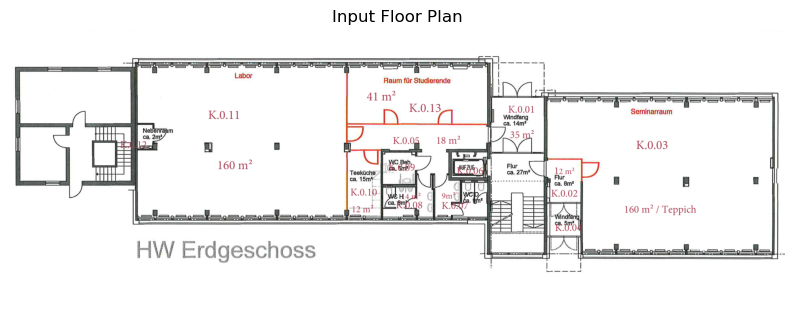

In [2]:
img = cv2.imread("data/floor_plan_cropped.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Input Floor Plan")
plt.show()


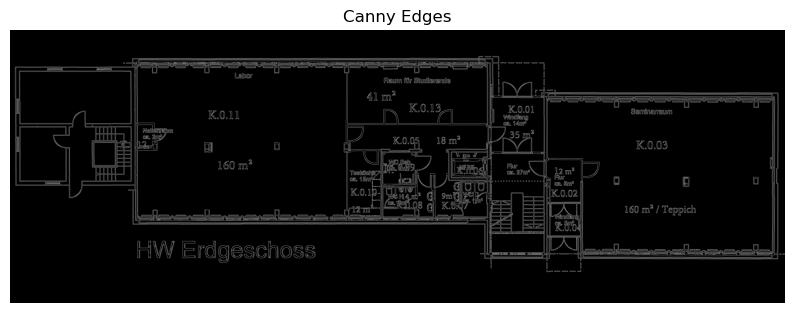

In [3]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)

plt.figure(figsize=(10,10))
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.title("Canny Edges")
plt.show()


In [4]:
contours, _ = cv2.findContours(
    edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
)

print(f"Total contours found: {len(contours)}")


Total contours found: 1474


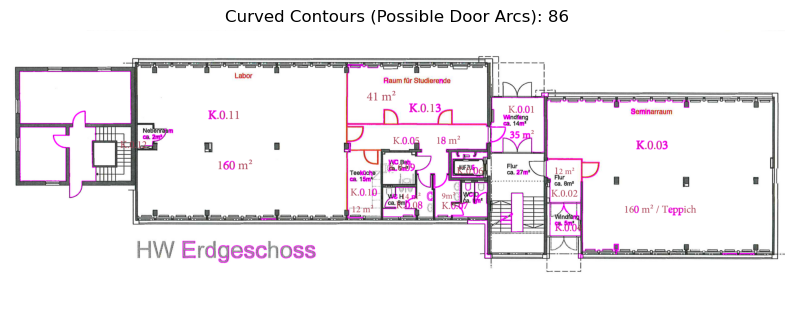

In [5]:
arc_candidates = []
vis = img_rgb.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area < 200:        # ignore tiny noise
        continue

    perimeter = cv2.arcLength(c, True)

    # Approximate contour
    approx = cv2.approxPolyDP(c, 0.02 * perimeter, True)

    # Curved objects have many points but low polygonal simplification
    if len(approx) > 6 and perimeter > 100:
        arc_candidates.append(c)
        cv2.drawContours(vis, [c], -1, (255, 0, 255), 2)

plt.figure(figsize=(10,10))
plt.imshow(vis)
plt.axis("off")
plt.title(f"Curved Contours (Possible Door Arcs): {len(arc_candidates)}")
plt.show()


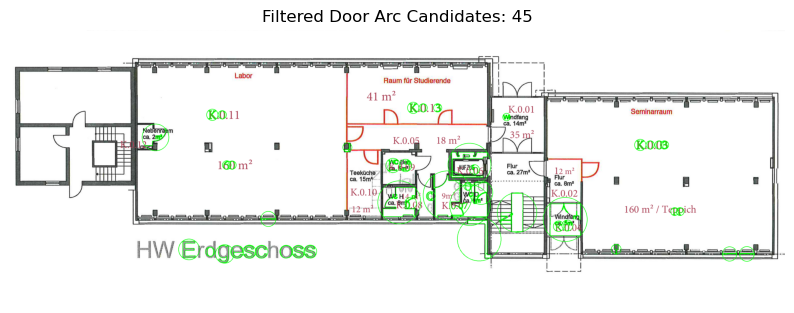

In [6]:
final_arcs = []
vis2 = img_rgb.copy()

for c in arc_candidates:
    (x, y), radius = cv2.minEnclosingCircle(c)

    if 20 < radius < 150:  # adjust to your plan scale
        final_arcs.append(c)
        cv2.circle(vis2, (int(x), int(y)), int(radius), (0, 255, 0), 2)
        cv2.drawContours(vis2, [c], -1, (0, 255, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(vis2)
plt.axis("off")
plt.title(f"Filtered Door Arc Candidates: {len(final_arcs)}")
plt.show()
